In [1]:
import numpy as np
import pandas as pd
# pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
import ydata_profiling as pp
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams["font.serif"] = ["SimHei"]
%matplotlib inline

In [2]:
# data reading
H_data=pd.read_csv(r'hotel_bookings.csv')
# check basic information
H_data.info()
H_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
# data cleaning
# 1 missing value processing
H_data.isnull().sum()
H_data.isnull().sum()/H_data.shape[0]
new_data=H_data.copy()
# delete company_data, cause the missing rate over 94%
new_data.drop("company",axis=1,inplace=True)  #inplace=True不创建新的对象，直接对原始对象进行修改；默认是False，即创建新的对象进行修改，原对象不变
# use median pad the missing position of children
new_data.children.fillna(new_data.children.median(),inplace=True)
# use mode pad the missing position of country
new_data.country.fillna(new_data.country.mode()[0],inplace=True)
# use 0 pad the agent
new_data.agent.fillna(0,inplace=True)

In [4]:
# check if duplicated, but here duplicated is normal,I do not precess it.
new_data.duplicated().sum()
new_data[new_data.duplicated()==True]
# new_data.drop_duplicates()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,1,No Deposit,250.0,0,Transient,84.67,0,1,Check-Out,2015-07-07
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,0.0,0,HB,ROU,Direct,Direct,0,0,0,E,E,0,No Deposit,250.0,0,Transient,137.00,0,1,Check-Out,2015-07-07
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,240.0,0,Transient,97.00,0,0,Canceled,2015-07-01
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,109.80,0,3,Check-Out,2015-07-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2017,August,35,31,0,3,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0,Transient,126.00,0,2,Check-Out,2017-09-03
119352,City Hotel,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119353,City Hotel,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119354,City Hotel,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03


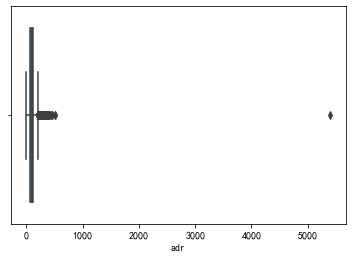

In [5]:
# outlier handling
# because children and agent cannot be a float
new_data.children=new_data.children.astype(int)
new_data.agent = new_data.agent.astype(int)
# undefined and SC is the same meaning in meal
new_data.meal.replace("undefined","SC",inplace=True)
new_data.describe()
# adults, children,babies can not be 0 at the same time.
G_zero=list(new_data["adults"]+new_data["children"]+new_data["babies"]==0)
new_data.drop(new_data.index[G_zero],inplace=True)
# check outlier in adr, adr can not as high as 5000
sns.boxplot(x=new_data["adr"])
new_data=new_data[new_data["adr"]<5000]
# translate arrival_date_month into number
import calendar
month =[]
for item in new_data.arrival_date_month:
    mon=list(calendar.month_name).index(item)
    month.append(mon)
new_data.insert(4,"arrival_month",month)


In [6]:
# combine arrival_date_year arrival_data_month, arrival_date_day_of_moth together as arrival_date
new_data[["arrival_date_year","arrival_month","arrival_date_day_of_month"]]=new_data[["arrival_date_year","arrival_month","arrival_date_day_of_month"]].apply(lambda x:x.astype(str))
date=new_data.arrival_date_year.str.cat([new_data.arrival_month,new_data.arrival_date_day_of_month],",")
new_data.insert(3,"arrival_date",date)
new_data.head()

,hotel,is_canceled,lead_time,arrival_date,arrival_date_year,arrival_month,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,"2015,7,1",2015,7,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,"2015,7,1",2015,7,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,"2015,7,1",2015,7,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,"2015,7,1",2015,7,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,"2015,7,1",2015,7,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [7]:
# add a column about total stay in nights
nums_days = new_data.stays_in_weekend_nights+new_data.stays_in_week_nights
new_data.insert(9,"stays_nights_total",nums_days)
# add a column about total peoples at the same order
nums_peoples=new_data.adults+new_data.children+new_data.babies
new_data.insert(12,"number_of_people",nums_peoples)
new_data.head()

,hotel,is_canceled,lead_time,arrival_date,arrival_date_year,arrival_month,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_nights_total,stays_in_weekend_nights,stays_in_week_nights,number_of_people,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,"2015,7,1",2015,7,July,27,1,0,0,0,2,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,"2015,7,1",2015,7,July,27,1,0,0,0,2,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,"2015,7,1",2015,7,July,27,1,1,0,1,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,"2015,7,1",2015,7,July,27,1,1,0,1,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,"2015,7,1",2015,7,July,27,1,2,0,2,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,0,Transient,98.0,0,1,Check-Out,2015-07-03


# 1. indicator analysis

## 1.1 reservation quantity

          hotel  amount  book_rage
0    City Hotel   79162     0.6641
1  Resort Hotel   40047     0.3359


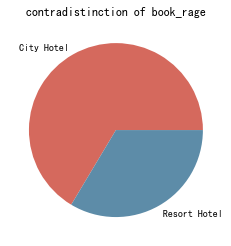

In [8]:
# analyze book rate of those two hotel
book_amount=new_data.groupby("hotel")["is_canceled"].count().reset_index().rename(columns={"is_canceled":"amount"})
book_amount["book_rage"]=round(book_amount["amount"]/book_amount.amount.sum(),4)
print(book_amount)
y=np.array([book_amount.book_rage[0],book_amount.book_rage[1]])
plt.pie(y,labels=["City Hotel","Resort Hotel"],colors=["#d5695d", "#5d8ca8"])
plt.title("contradistinction of book_rage")
plt.show()

## 1.2 reservation occupancy rate

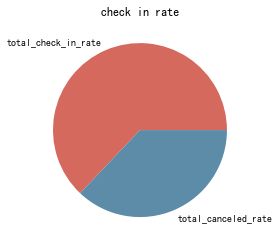

In [9]:
# check the totaly check in rate
total_check_in_rate=(round(new_data.groupby("is_canceled")["is_canceled"].count()[0] / new_data.shape[0]*100,2))
total_canceled_rate=(round(new_data.groupby("is_canceled")["is_canceled"].count()[1] / new_data.shape[0]*100,2))
y=np.array([(total_check_in_rate),(total_canceled_rate)])
plt.pie(y,labels=["total_check_in_rate","total_canceled_rate"],colors=["#d5695d", "#5d8ca8"])
plt.title("check in rate")
plt.show()

In [10]:
# compare the check in rate between hotels
rh_iscanceled_count=new_data[new_data["hotel"]=="Resort Hotel"].groupby("is_canceled")["hotel"].count().reset_index().rename(columns={"hotel":"amount"})
# new_data[new_data["hotel"]=="Resort Hotel"] 选中数据中hotel列里面为Restor hotel 的数据
# groupby("is_canceled")["hotel"].count() 按is_canceled进行分组后对其统计count（），
#   统计出is_canceled 里面各种不同值分别的数量。这里选中“hotel”的意思是在这一列进行统计，
#   可以先选中任何一列都是一样的，也可以不选，则在每一列都进行统计is_canceled中不同数据的数量。
# reset_index().rename(columns={"hotel":"amount"}，之前count（）的时候是把“hotel”设置为索引，现在reset还原回去，并重命名
rh_canceled_data=pd.DataFrame({"hotel":"Resort Hotel",
                              "is_canceled":rh_iscanceled_count.is_canceled,
                              "count":rh_iscanceled_count.amount,
                              "total_amount":rh_iscanceled_count.amount.sum(),
                              "iscanceled_rate":rh_iscanceled_count.amount/rh_iscanceled_count.amount.sum()})

ch_iscanceled_count=new_data[new_data["hotel"]=="City Hotel"].groupby("is_canceled")["hotel"].count().reset_index().rename(columns={"hotel":"amount"})
ch_iscanceled_data=pd.DataFrame({"hotel":"City Hotel",
                                "is_canceled":ch_iscanceled_count["is_canceled"],
                                "count":ch_iscanceled_count["amount"],
                                "total_amount":ch_iscanceled_count.amount.sum(),
                                "iscanceled_rate":ch_iscanceled_count["amount"]/ch_iscanceled_count["amount"].sum()})
# merge those two togeter
iscanceled_data=pd.concat([rh_canceled_data,ch_iscanceled_data],ignore_index=True)
iscanceled_data

,hotel,is_canceled,count,total_amount,iscanceled_rate
0,Resort Hotel,0,28927,40047,0.722326
1,Resort Hotel,1,11120,40047,0.277674
2,City Hotel,0,46084,79162,0.582148
3,City Hotel,1,33078,79162,0.417852


#### according to the result,although City Hotel has a larger booking amount, about two times of Resort Hotel, but the canceled rate is also very high

## 1.3 repeated booking rate total and respective

In [11]:

reversal_book_rate=str(round(new_data.groupby("is_repeated_guest").is_repeated_guest.count()[1]/new_data.shape[0]*100,2))+"%"
print("the total repeated booking rate is: ",reversal_book_rate)
data_rb=new_data.groupby(["hotel","is_repeated_guest"])["hotel"].count()
# repeated booking rate of City Hotel
resersal_BR_CityH=data_rb["City Hotel",1]/data_rb["City Hotel"].sum()
resersal_BR_ResortH=data_rb["Resort Hotel",1]/data_rb["Resort Hotel"].sum()
print("repeated booking rate of City Hotel is: ",str(round(resersal_BR_CityH*100,2))+"%")
print("repeated booking rate of Resort Hotel is: ",str(round(resersal_BR_ResortH*100,2))+"%")

the total repeated booking rate is:  3.15%
repeated booking rate of City Hotel is:  2.5%
repeated booking rate of Resort Hotel is:  4.44%


# 2. problem analysis

In [12]:
new_data["hotel"].value_counts()
# 这个是统计在new_data中，hotel这一列有多少个不同项， City hotel 出现了79162次。另一个出现40047次

City Hotel      79162
Resort Hotel    40047
Name: hotel, dtype: int64

In [13]:
# 划分数据集，按照new_data["hotel"]=="Resort Hotel" 和 new_data["is_canceled"]==0 来划分
rh=new_data[(new_data["hotel"]=="Resort Hotel")&(new_data["is_canceled"]==0)]
ch=new_data[(new_data["hotel"]=="City Hotel")&(new_data["is_canceled"]==0)]

## 2.1 find the most popular room types

   assigned_room_type  room_counts    hotel_type
0                   A        30081    City_Hotle
1                   B         1493    City_Hotle
2                   C          143    City_Hotle
3                   D        10698    City_Hotle
4                   E         1626    City_Hotle
5                   F         1299    City_Hotle
6                   G          568    City_Hotle
7                   K          176    City_Hotle
8                   A        10996  Resort_Hotel
9                   B          150  Resort_Hotel
10                  C         1781  Resort_Hotel
11                  D         8249  Resort_Hotel
12                  E         4210  Resort_Hotel
13                  F         1525  Resort_Hotel
14                  G         1201  Resort_Hotel
15                  H          461  Resort_Hotel
16                  I          354  Resort_Hotel


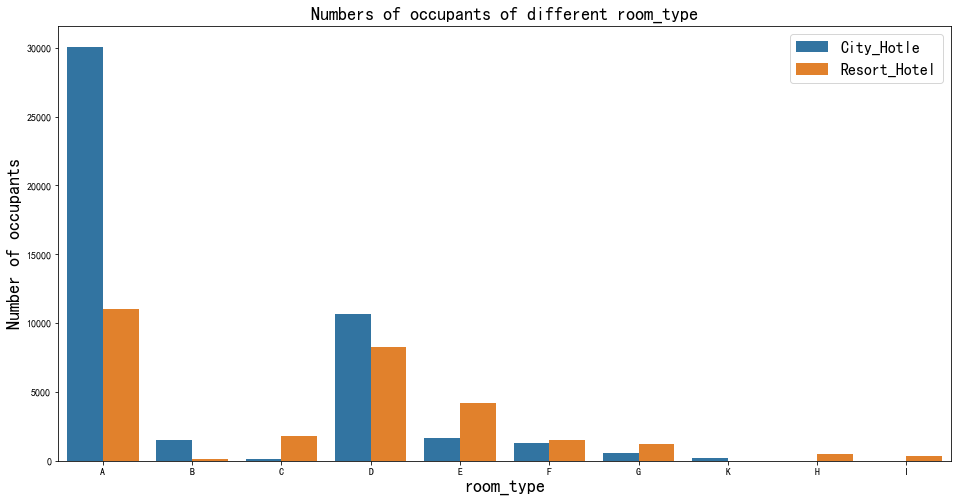

In [14]:
rh_room=rh.groupby("assigned_room_type")["hotel"].count().reset_index().rename(columns={"hotel":"room_counts"})
ch_room=ch.groupby("assigned_room_type")["hotel"].count().reset_index().rename(columns={"hotel":"room_counts"})
rh_room["hotel_type"]="Resort_Hotel"
ch_room["hotel_type"]="City_Hotle"
all_room=pd.concat([ch_room,rh_room],ignore_index=True)
print(all_room)
# show it
plt.figure(figsize=(16,8))
sns.barplot(x="assigned_room_type",y="room_counts",hue="hotel_type",data=all_room,hue_order=["City_Hotle","Resort_Hotel"])
plt.title("Numbers of occupants of different room_type",fontsize=18)
plt.xlabel("room_type",fontsize=18)
plt.ylabel("Number of occupants",fontsize=18)
plt.legend(loc="upper right",fontsize=16)
plt.show()

## 2.2 find the most popular room types in different season

C:\Users\water\AppData\Local\Temp\ipykernel_19480\3574530203.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rh["season"]=rh["arrival_date_month"].map(season)
C:\Users\water\AppData\Local\Temp\ipykernel_19480\3574530203.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ch["season"]=ch["arrival_date_month"].map(season)


   reserved_room_type  season  room_counts         hotel
0                   A    fall        10862    City_Hotle
44                  F    fall          280  Resort_Hotle
32                  C    fall          220  Resort_Hotle
22                  G    fall          120    City_Hotle
14                  E    fall          273    City_Hotle
48                  G    fall          294  Resort_Hotle
40                  E    fall          999  Resort_Hotle
10                  D    fall         2097    City_Hotle
18                  F    fall          385    City_Hotle
26                  A    fall         4350  Resort_Hotle
52                  H    fall          104  Resort_Hotle
56                  L    fall            2  Resort_Hotle
4                   B    fall          235    City_Hotle
36                  D    fall         1685  Resort_Hotle
8                   C    fall            4    City_Hotle
27                  A  spring         4630  Resort_Hotle
23                  G  spring  

<Figure size 4320x4320 with 0 Axes>

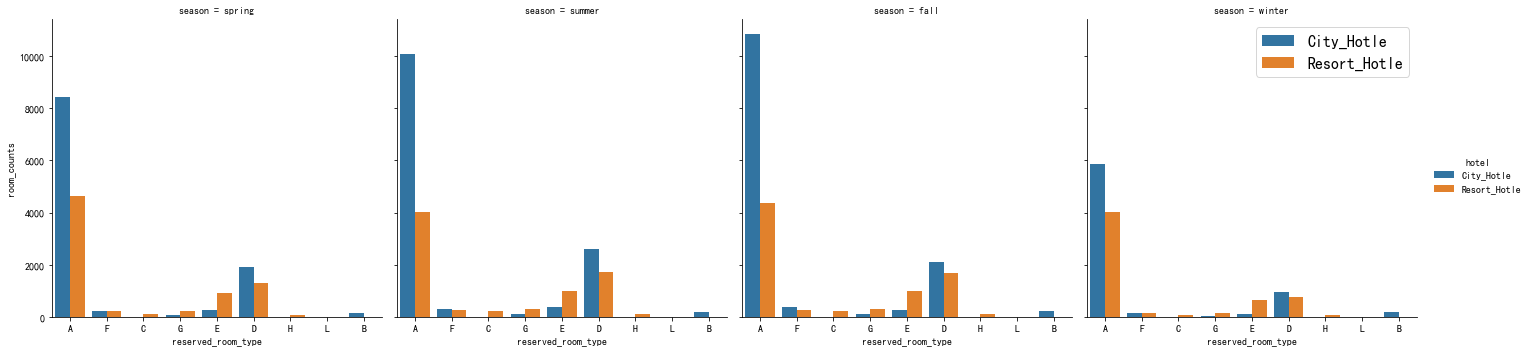

In [106]:
rh=new_data[(new_data["hotel"]=="Resort Hotel")&(new_data["is_canceled"]==0)]
ch=new_data[(new_data["hotel"]=="City Hotel")&(new_data["is_canceled"]==0)]
season={"January":"winter","February":"spring","March":"spring","April":"spring","May":"summer","June":"summer","July":"summer","August":"fall","September":"fall","October":"fall","November":"winter","December":"winter"}
# a=rh["arrival_date_month"].map(season).reset_index()

# a.rename(columns={"arrival_date_month":"season"},inplace = True)
# print(a)
# rh=pd.concat([rh,a],axis=1)
# rh.rename(columns={"arrival_date_month":"season"},inplace = True)
# b=ch["arrival_date_month"].map(season)
# ch=pd.concat([ch,b],axis=1)
# ch.rename(columns={"arrival_date_month":"season"},inplace = True)
# 如下这种操作也可以，但是会因 Chaining assignment 而引起 SettingWithCopyWarning
rh["season"]=rh["arrival_date_month"].map(season) 
ch["season"]=ch["arrival_date_month"].map(season)

rh_room_season=rh.groupby(["reserved_room_type","season"])["hotel"].count().reset_index().rename(columns={"hotel":"room_counts"})
ch_room_season=ch.groupby(["reserved_room_type","season"])["hotel"].count().reset_index().rename(columns={"hotel":"room_counts"})
rh_room_season["hotel"]="Resort_Hotle"
ch_room_season["hotel"]="City_Hotle"
all_room_season = pd.concat([ch_room_season,rh_room_season],axis=0,ignore_index=True).sort_values("season")
print(all_room_season)
plt.figure(figsize=(60,60))
sns.catplot(x="reserved_room_type",y="room_counts",hue="hotel",col="season",data=all_room_season,kind="bar",col_order=["spring","summer","fall","winter"],hue_order=["City_Hotle","Resort_Hotle"])
plt.legend(loc="upper right",fontsize=16)
# sns.catplot(x="reserved_room_type",y="room_counts",hue="hotel",col="seasons",data=all_room_season,kind="bar",col_order=["spring","summer","fall","winter"],hue_order=["City_Hotle","Resort_Hotle"])